In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import math


In [4]:
#Read data 
data = pd.read_csv('all_data.csv')
# Set the display format for float values
pd.options.display.float_format = '{:.2f}'.format
print(data.head())


unique_countries = data['Country'].unique()
print(unique_countries)
print("Unique Countries in the Dataset:")
for country in unique_countries:
    print(country)

# Calculate the five-number summary of GDP per country
gdp_summary = data.groupby('Country')['GDP'].describe()

# Display the five-number summary
print("Five-Number Summary of GDP per Country:")
print(gdp_summary)

  Country  Year  Life expectancy at birth (years)            GDP
0   Chile  2000                             77.30 77860932152.00
1   Chile  2001                             77.30 70979923960.00
2   Chile  2002                             77.80 69736811435.00
3   Chile  2003                             77.90 75643459840.00
4   Chile  2004                             78.00 99210392858.00
['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']
Unique Countries in the Dataset:
Chile
China
Germany
Mexico
United States of America
Zimbabwe
Five-Number Summary of GDP per Country:
                          count              mean              std  \
Country                                                              
Chile                     16.00   169788845015.31   76878841264.91   
China                     16.00  4957713750000.00 3501095794796.97   
Germany                   16.00  3094775625000.00  667486247917.95   
Mexico                    16.00   976650625000.00  

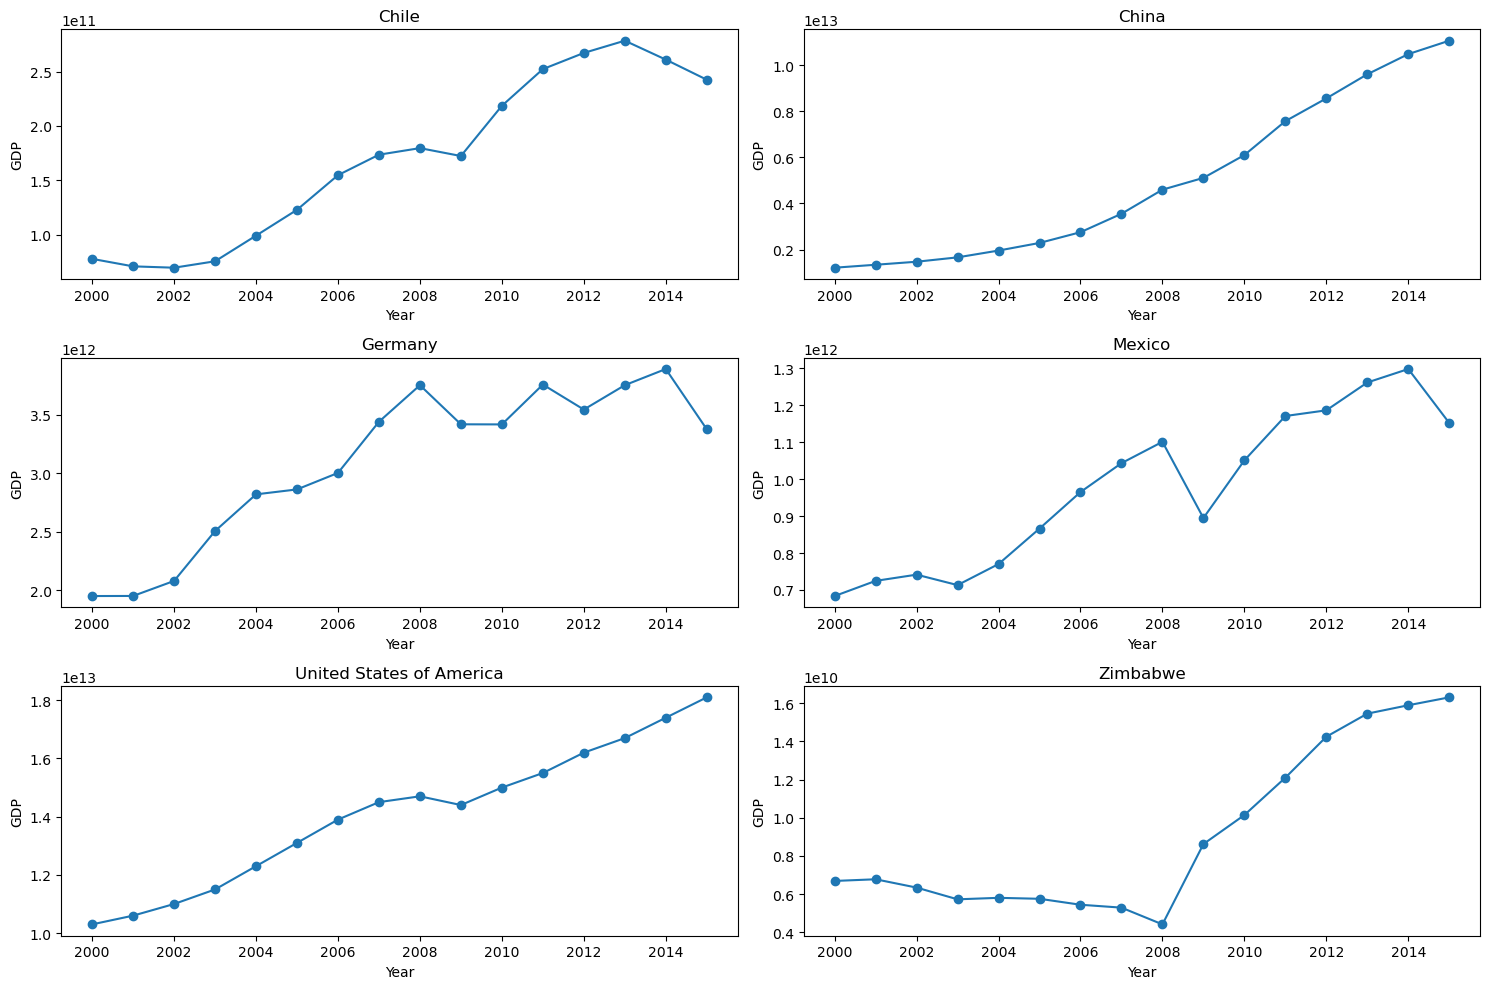

<Figure size 640x480 with 0 Axes>

In [5]:
# Set the figure size for subplots
plt.figure(figsize=(15, 10))

# Create subplots for each country
for i, country in enumerate(unique_countries, start=1):
    plt.subplot(3, 2, i)
    country_data = data[data['Country'] == country]
    plt.plot(country_data['Year'], country_data['GDP'], marker='o')
    plt.title(country)
    plt.xlabel('Year')
    plt.ylabel('GDP')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()
plt.clf()


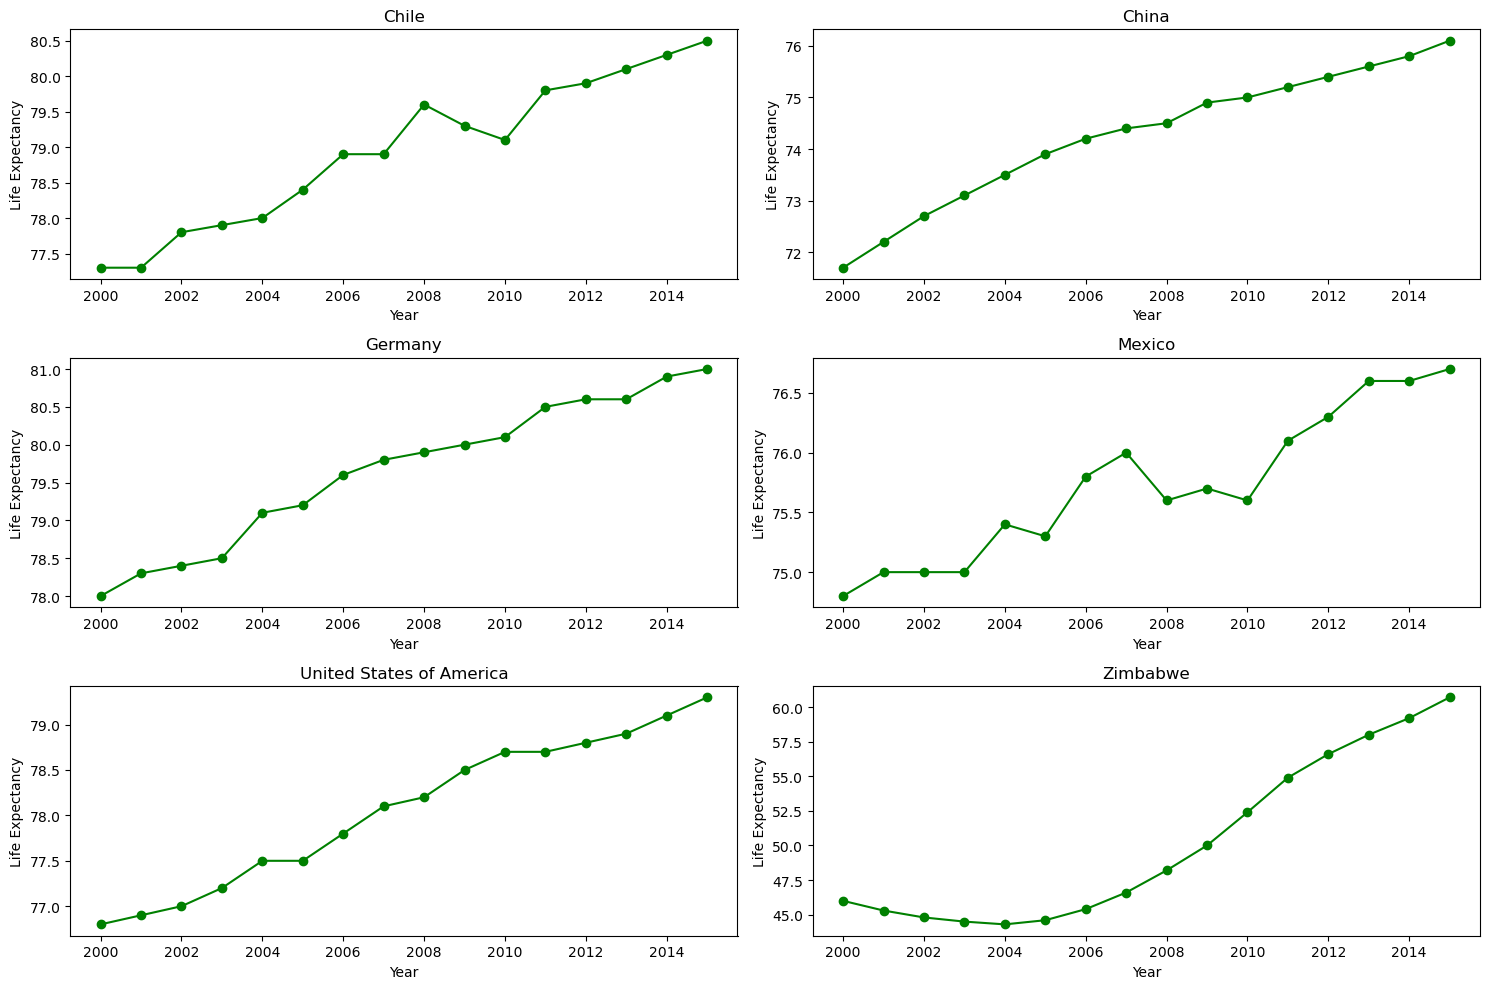

<Figure size 640x480 with 0 Axes>

In [6]:
# Set the figure size for subplots
plt.figure(figsize=(15, 10))

# Create subplots for each country
for i, country in enumerate(unique_countries, start=1):
    plt.subplot(3, 2, i)
    country_data = data[data['Country'] == country]
    plt.plot(country_data['Year'], country_data['Life expectancy at birth (years)'], marker='o', color='green')
    plt.title(country)
    plt.xlabel('Year')
    plt.ylabel('Life Expectancy')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()
plt.clf()

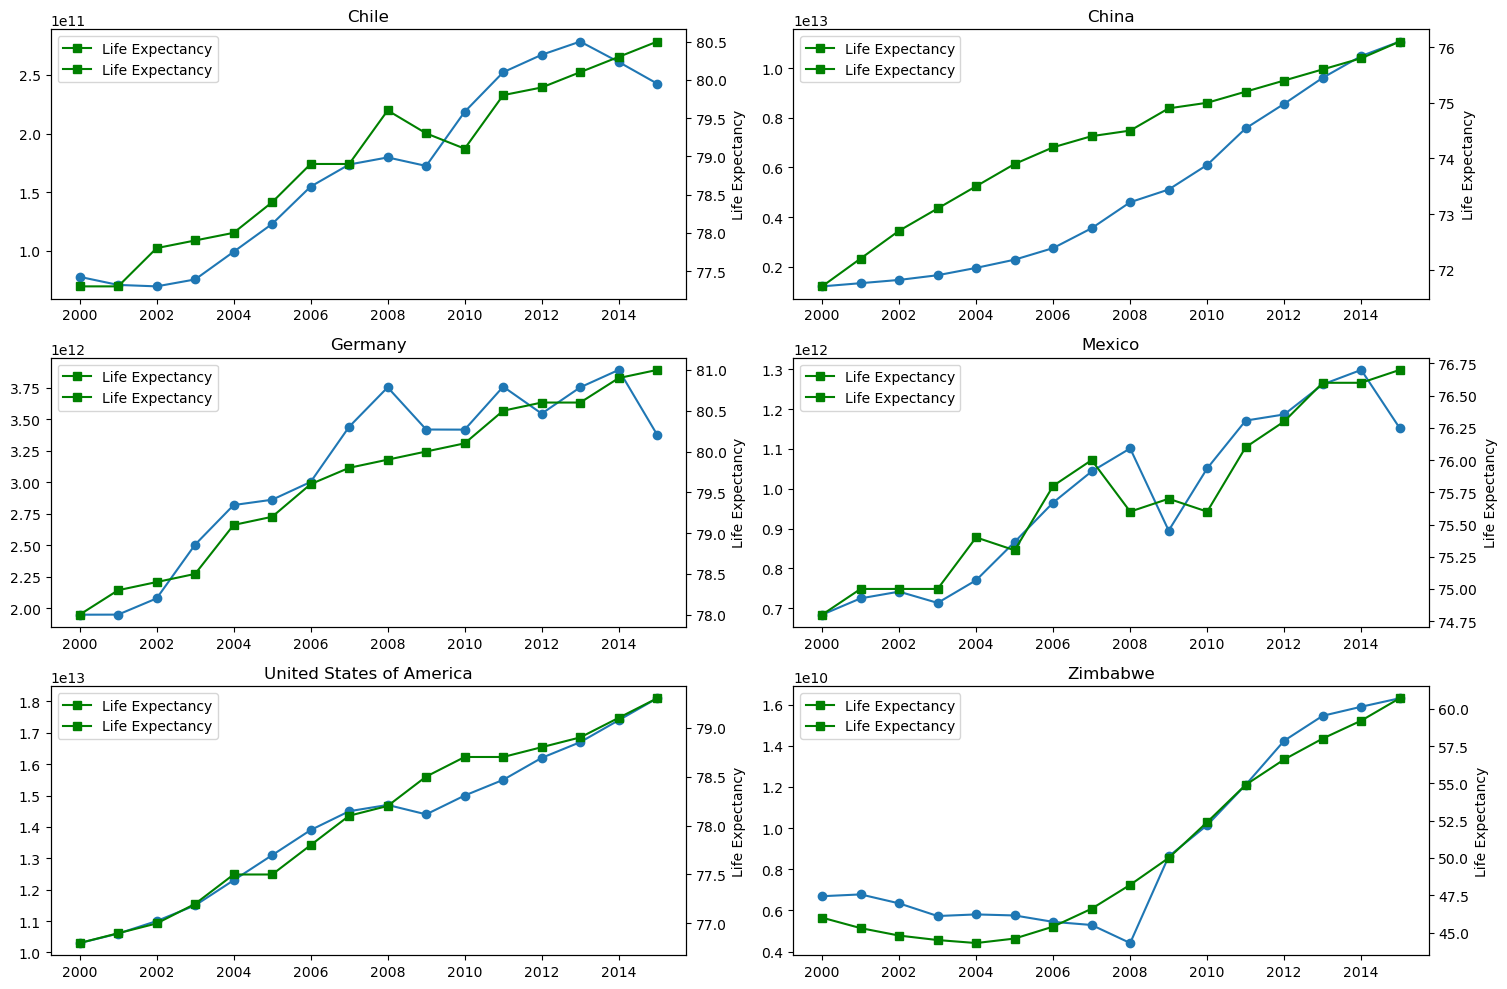

<Figure size 640x480 with 0 Axes>

In [7]:
# Set the figure size for subplots
plt.figure(figsize=(15, 10))

# Create subplots for each country
for i, country in enumerate(unique_countries, start=1):
    plt.subplot(3, 2, i)
    country_data = data[data['Country'] == country]
    
    # Plot GDP
    plt.plot(country_data['Year'], country_data['GDP'], marker='o', label='GDP')
    
    # Plot life expectancy on secondary y-axis
    ax = plt.gca().twinx()
    ax.plot(country_data['Year'], country_data['Life expectancy at birth (years)'], marker='s', color='green', label='Life Expectancy')
    
    plt.title(country)
    plt.xlabel('Year')
    plt.ylabel('GDP')
    ax.set_ylabel('Life Expectancy')
    
    # Show legend
    lines, labels = plt.gca().get_legend_handles_labels()
    lines2, labels2 = ax.get_legend_handles_labels()
    plt.legend(lines + lines2, labels + labels2, loc='upper left')
    
# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()
plt.clf()


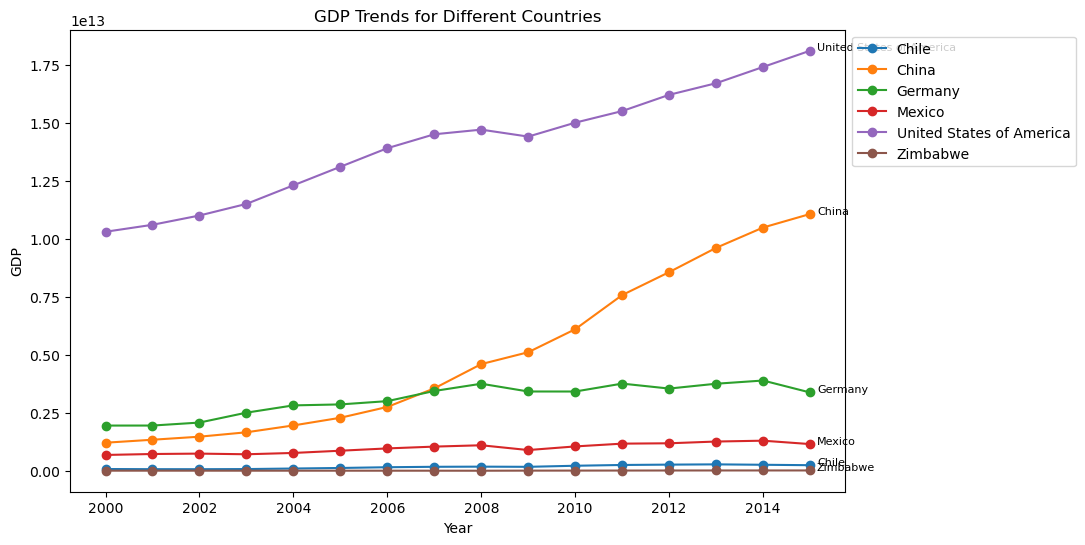

In [16]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Plot GDP for each country
for country in unique_countries:
    country_data = data[data['Country'] == country]
    plt.plot(country_data['Year'], country_data['GDP'], marker='o', label=country)

# Add country name annotation at the endpoint
for country in unique_countries:
    country_data = data[data['Country'] == country]
    plt.annotate(country, xy=(country_data.iloc[-1]['Year'], country_data.iloc[-1]['GDP']), xytext=(5, 0), textcoords='offset points', fontsize=8)

# Set labels and title
plt.xlabel('Year')
plt.ylabel('GDP')
plt.title('GDP Trends for Different Countries')

# Add legend
plt.legend(loc='best', bbox_to_anchor=(1,1))

# Show plot
plt.show()


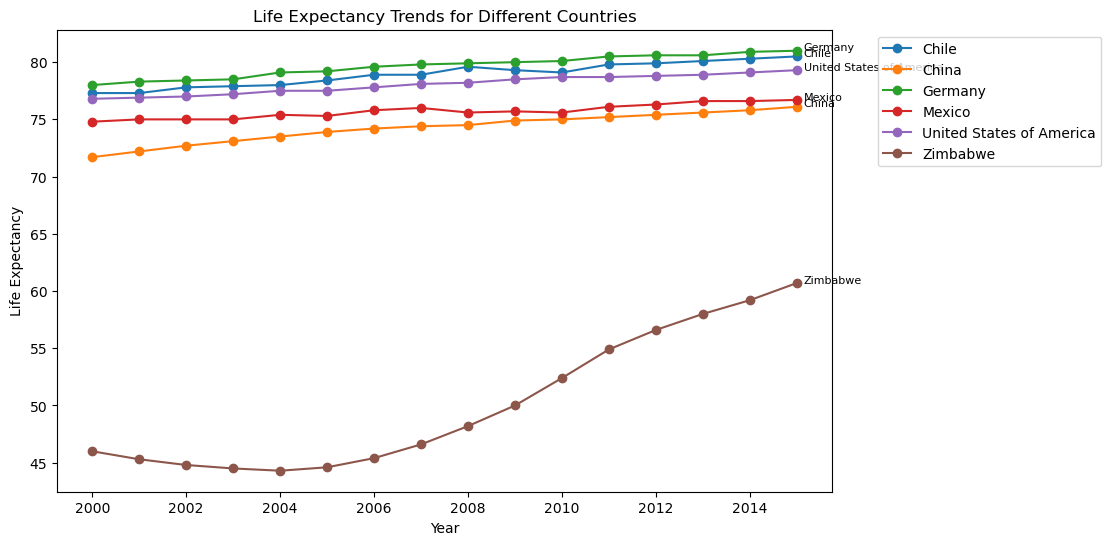

In [20]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Plot life expectancy for each country
for country in unique_countries:
    country_data = data[data['Country'] == country]
    plt.plot(country_data['Year'], country_data['Life expectancy at birth (years)'], marker='o', label=country)

# Add country name annotation at the endpoint
for country in unique_countries:
    country_data = data[data['Country'] == country]
    plt.annotate(country, xy=(country_data.iloc[-1]['Year'], country_data.iloc[-1]['Life expectancy at birth (years)']), xytext=(5, 0), textcoords='offset points', fontsize=8)

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy Trends for Different Countries')

# Add legend with adjusted position
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))

# Show plot
plt.show()


In [9]:
import statsmodels.api as sm

# Prepare the data
X = data['GDP']
y = data['Life expectancy at birth (years)']

# Add a constant to the independent variable (GDP)
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())


                                   OLS Regression Results                                   
Dep. Variable:     Life expectancy at birth (years)   R-squared:                       0.118
Model:                                          OLS   Adj. R-squared:                  0.108
Method:                               Least Squares   F-statistic:                     12.55
Date:                              Sat, 11 May 2024   Prob (F-statistic):           0.000619
Time:                                      23:15:59   Log-Likelihood:                -357.00
No. Observations:                                96   AIC:                             718.0
Df Residuals:                                    94   BIC:                             723.1
Df Model:                                         1                                         
Covariance Type:                          nonrobust                                         
                 coef    std err          t      P>|t|      [0.025    

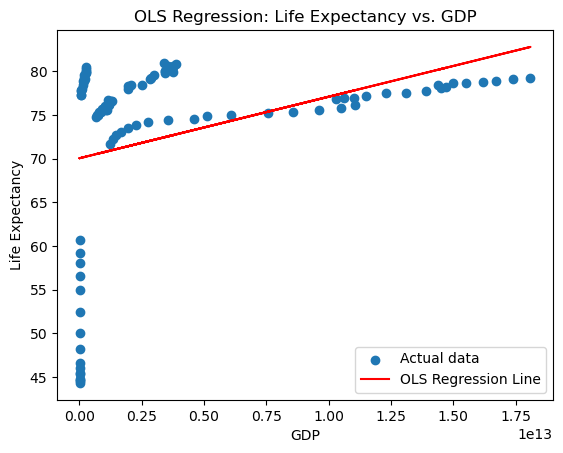

In [10]:
# Scatter plot of GDP and life expectancy
plt.scatter(data['GDP'], data['Life expectancy at birth (years)'], label='Actual data')

# Plot the regression line
plt.plot(data['GDP'], model.predict(X), color='red', label='OLS Regression Line')

# Set labels and title
plt.xlabel('GDP')
plt.ylabel('Life Expectancy')
plt.title('OLS Regression: Life Expectancy vs. GDP')

# Add legend
plt.legend()

# Show plot
plt.show()


In [11]:
from statsmodels.tsa.arima.model import ARIMA

# Example: Forecasting GDP for a specific country (e.g., China)
country_data = data[data['Country'] == 'Chile']

# Prepare the GDP data for forecasting
gdp_data = country_data[['Year', 'GDP']].set_index('Year')

# Fit ARIMA model for GDP forecasting
model = ARIMA(gdp_data, order=(1, 1, 1))  # Example order parameters (p, d, q)
model_fit = model.fit()

# Forecast future GDP values
forecast_steps = 5  # Number of steps to forecast
forecast = model_fit.forecast(steps=forecast_steps)

# Print the forecasted GDP values
print("Forecasted GDP for the next {} years:".format(forecast_steps))
print(forecast)


Forecasted GDP for the next 5 years:
16   248639458142.35
17   254500968900.13
18   260113570924.76
19   265487834111.96
20   270633879507.41
Name: predicted_mean, dtype: float64


c:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
